<a href="https://colab.research.google.com/github/A-Muthurama/Prodigy_ML_01/blob/main/prodigy_ml_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from seaborn import heatmap
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import classification_report

**LOAD THE DATASET**

In [ ]:
df=pd.read_csv('/content/train (1).csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
subset=['GrLivArea','HalfBath','BedroomAbvGr','FullBath','OverallQual','TotRmsAbvGrd','SalePrice']
df=df[subset]
df.head()

,GrLivArea,HalfBath,BedroomAbvGr,FullBath,OverallQual,TotRmsAbvGrd,SalePrice
0,1710,1,3,2,7,8,208500
1,1262,0,3,2,6,6,181500
2,1786,1,3,2,7,6,223500
3,1717,0,3,1,7,7,140000
4,2198,1,4,2,8,9,250000


In [ ]:
df.info

<bound method DataFrame.info of       GrLivArea  HalfBath  BedroomAbvGr  FullBath  OverallQual  TotRmsAbvGrd  \
0          1710         1             3         2            7             8   
1          1262         0             3         2            6             6   
2          1786         1             3         2            7             6   
3          1717         0             3         1            7             7   
4          2198         1             4         2            8             9   
...         ...       ...           ...       ...          ...           ...   
1455       1647         1             3         2            6             7   
1456       2073         0             3         2            6             7   
1457       2340         0             4         2            7             9   
1458       1078         0             2         1            5             5   
1459       1256         1             3         1            5             6   

      S

In [ ]:
df.describe()

,GrLivArea,HalfBath,BedroomAbvGr,FullBath,OverallQual,TotRmsAbvGrd,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1515.463699,0.382877,2.866438,1.565068,6.099315,6.517808,180921.195890
std,525.480383,0.502885,0.815778,0.550916,1.382997,1.625393,79442.502883
min,334.000000,0.000000,0.000000,0.000000,1.000000,2.000000,34900.000000
25%,1129.500000,0.000000,2.000000,1.000000,5.000000,5.000000,129975.000000
50%,1464.000000,0.000000,3.000000,2.000000,6.000000,6.000000,163000.000000
75%,1776.750000,1.000000,3.000000,2.000000,7.000000,7.000000,214000.000000
max,5642.000000,2.000000,8.000000,3.000000,10.000000,14.000000,755000.000000


In [ ]:
df.isnull().sum()

GrLivArea       0
HalfBath        0
BedroomAbvGr    0
FullBath        0
OverallQual     0
TotRmsAbvGrd    0
SalePrice       0
dtype: int64

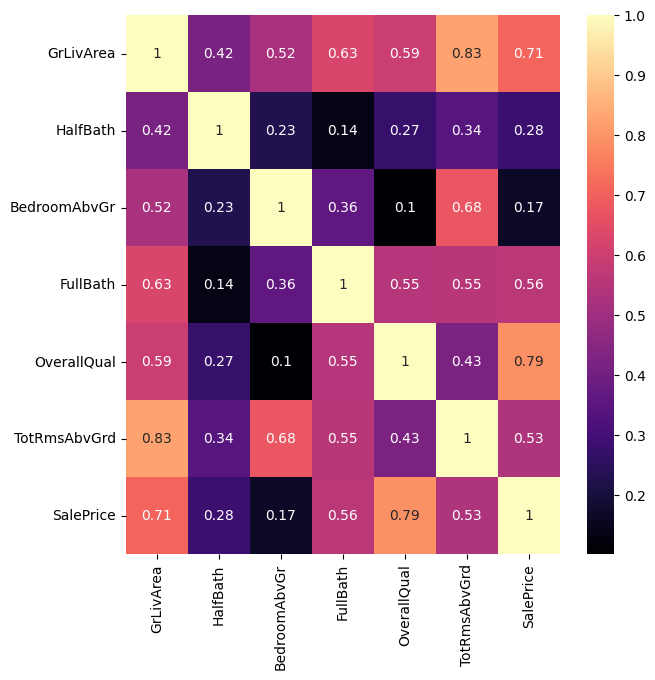

In [ ]:
corr_mat=df.corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr_mat,annot=True,cmap='magma')
plt.show()

**Linear Regression model**

In [ ]:
x=df[['FullBath','HalfBath','OverallQual','GrLivArea',"BedroomAbvGr"]]
y=df[['SalePrice']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

Text(0, 0.5, 'Prediction price')

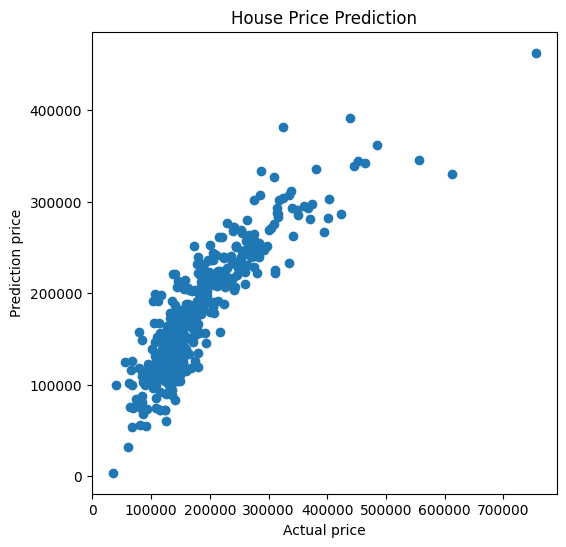

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred)
plt.title("House Price Prediction")
plt.xlabel('Actual price')
plt.ylabel('Prediction price')

In [ ]:
mse=mean_squared_error(y_test,y_pred)
r2score=r2_score(y_test,y_pred)
print('Mean Squared Error:',mse)
print('R2_score:',r2score)

Mean Squared Error: 1685432572.066245
R2_score: 0.7584680530518735
